In [1]:
import matplotlib.pyplot as plt
import numpy as np

The RK4 method is an iterative method of calculating an integral of a differential equation by incrementing the independent valuable and calculating a new dependent variable at each step. 
It takes the formula:

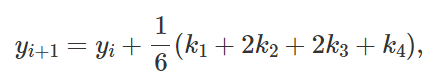

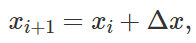

where delta(x) is the increment dx and k1, k2, k3, k4 are calculated as follows:

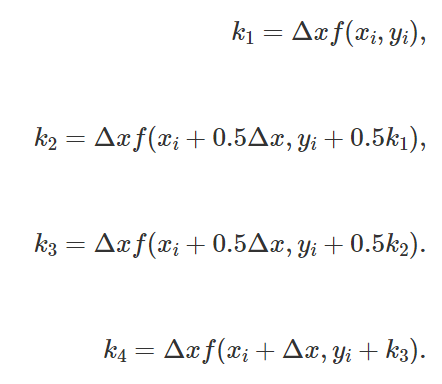

In [3]:
def RungeKutta(x, y, dx, dydx):
    
    #implement the functions for k1:k4
    k1 = dx*dydx(x, y)
    k2 = dx*dydx(x+dx/2., y+k1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2.)
    k4 = dx*dydx(x+dx, y+k3)
    
    #implement the functions for xi+1 and yi+1
    y = y + 1./6*(k1+2*k2+2*k3+k4)
    x = x + dx
    
    return x, y

**Demonstration of the RK4 method in resolving the equation:
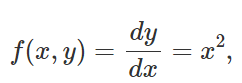

In [5]:
def dydx1(x, y):
    return x**2

def y1(x):
    return x**3/3.+2/3 #the exact value of the integration

In [6]:
#set up initial values including starting positions, increment and ending pos
x0 = 1
y0 = 1
dx = 0.1
x_end = 2

In [8]:
x_rk = [x0]
y_rk = [y0]

y = y0
x = x0

while x <= x_end:
    x, y = RungeKutta(x, y, dx, dydx1)
    
    x_rk.append(x)
    y_rk.append(y) #update x and y with the runge kutta results until x reaches x_end

In [9]:
#for comparison
def Euler(x, y, dx, dydx):
    return x+dx, y+dx*dydx(x, y)

x_eu = [x0]
y_eu = [y0]

y = y0
x = x0

while x <= x_end:
    
    x, y = Euler(x, y, dx, dydx1)

    x_eu.append(x)
    y_eu.append(y)

**Plot the exact, Runge-Kutta and Euler solutions of each**

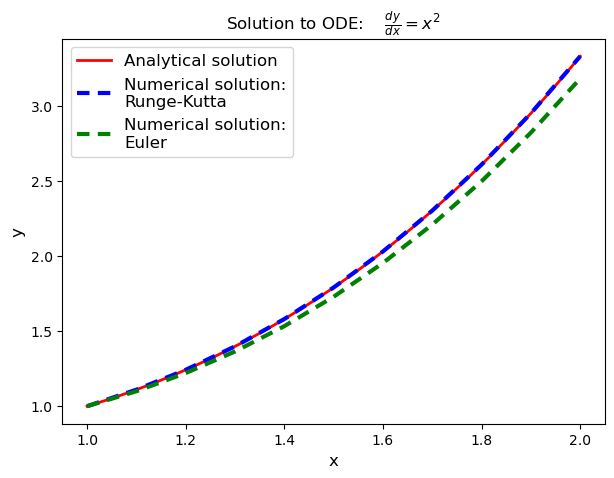

In [11]:
plt.figure(figsize=(7,5))

plt.plot(np.linspace(1,2,50), y1(np.linspace(1,2,50)), 
         label="Analytical solution",color="red", lw=2)

plt.plot(x_rk, y_rk, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",
        lw=3)
plt.plot(x_eu, y_eu, label="Numerical solution:\nEuler", dashes=(3,2), color="green",
        lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=x^2$")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()

**As shown, Runge-Kutta is more accurate than the Euler method**